# titanic

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
t_df=pd.read_csv('/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/titanic.csv')

t_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [61]:
t_df_s=t_df[['survived','sex','age']]
t_df_s

,survived,sex,age
0,0,male,22.0
1,1,female,38.0
2,1,female,26.0
3,1,female,35.0
4,0,male,35.0
...,...,...,...
886,0,male,27.0
887,1,female,19.0
888,0,female,NaN
889,1,male,26.0


In [62]:
t_df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   sex       891 non-null    object 
 2   age       714 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 21.0+ KB


In [63]:
t_df_s = t_df_s.dropna()

In [64]:
t_df_s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   sex       714 non-null    object 
 2   age       714 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 22.3+ KB


In [65]:
t_df_s=t_df_s[t_df_s['survived']==1]
t_df_s

,survived,sex,age
1,1,female,38.0
2,1,female,26.0
3,1,female,35.0
8,1,female,27.0
9,1,female,14.0
...,...,...,...
875,1,female,15.0
879,1,female,56.0
880,1,female,25.0
887,1,female,19.0


In [66]:
t_df_s.drop('survived',axis=1,inplace=True)

In [67]:
t_df_s['age_group'] = t_df_s['age']//10

In [68]:
t_df_s

,sex,age,age_group
1,female,38.0,3.0
2,female,26.0,2.0
3,female,35.0,3.0
8,female,27.0,2.0
9,female,14.0,1.0
...,...,...,...
875,female,15.0,1.0
879,female,56.0,5.0
880,female,25.0,2.0
887,female,19.0,1.0


In [69]:
t_df_s.iloc[:, -1] = t_df_s.iloc[:, -1].astype(int).astype(str)+"0대"
t_df_s

<ipython-input-69-03a3a3bafbd0>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1      30대
2      20대
3      30대
8      20대
9      10대
      ... 
875    10대
879    50대
880    20대
887    10대
889    20대
Name: age_group, Length: 290, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  t_df_s.iloc[:, -1] = t_df_s.iloc[:, -1].astype(int).astype(str)+"0대"


,sex,age,age_group
1,female,38.0,30대
2,female,26.0,20대
3,female,35.0,30대
8,female,27.0,20대
9,female,14.0,10대
...,...,...,...
875,female,15.0,10대
879,female,56.0,50대
880,female,25.0,20대
887,female,19.0,10대


In [70]:
t_df_s.reset_index(inplace=True)

In [71]:
t_df_s.drop('index',axis=1,inplace=True)

In [72]:
for i in range(len(t_df_s['age_group'])):
  if t_df_s.loc[i,'age_group']=="00대":
    t_df_s.loc[i,'age_group']="10세 이하"

In [73]:
t_df_s['age_group'].unique()

array(['30대', '20대', '10대', '10세 이하', '50대', '40대', '60대', '80대'],
      dtype=object)

In [74]:
t_df_s

,sex,age,age_group
0,female,38.0,30대
1,female,26.0,20대
2,female,35.0,30대
3,female,27.0,20대
4,female,14.0,10대
...,...,...,...
285,female,15.0,10대
286,female,56.0,50대
287,female,25.0,20대
288,female,19.0,10대


In [75]:
t_df_s.drop('age',axis=1,inplace=True)

In [76]:
t_df_s_m=t_df_s[t_df_s['sex']=='male']

In [77]:
t_df_s_m

,sex,age_group
8,male,30대
10,male,20대
22,male,30대
23,male,10세 이하
25,male,20대
...,...,...
270,male,10세 이하
272,male,30대
277,male,50대
282,male,10세 이하


In [78]:
t_df_s_c=t_df_s.value_counts()
t_df_s_c

sex     age_group
female  20대          52
        30대          50
        10대          34
male    20대          25
        30대          23
female  40대          22
        10세 이하       19
male    10세 이하       19
female  50대          16
male    40대          12
        10대           7
female  60대           4
male    50대           4
        60대           2
        80대           1
Name: count, dtype: int64

In [79]:
t_df_s_c.sort_index(inplace=True)
t_df_s_c

sex     age_group
female  10대          34
        10세 이하       19
        20대          52
        30대          50
        40대          22
        50대          16
        60대           4
male    10대           7
        10세 이하       19
        20대          25
        30대          23
        40대          12
        50대           4
        60대           2
        80대           1
Name: count, dtype: int64

In [80]:
t_df_s_c_df=pd.DataFrame(t_df_s_c)
t_df_s_c_df

count
sex    age_group       
female 10대           34
       10세 이하        19
       20대           52
       30대           50
       40대           22
       50대           16
       60대            4
male   10대            7
       10세 이하        19
       20대           25
       30대           23
       40대           12
       50대            4
       60대            2
       80대            1

In [81]:
t_df_s_c_df.reset_index(inplace=True,)
t_df_s_c_df

,sex,age_group,count
0,female,10대,34
1,female,10세 이하,19
2,female,20대,52
3,female,30대,50
4,female,40대,22
5,female,50대,16
6,female,60대,4
7,male,10대,7
8,male,10세 이하,19
9,male,20대,25


In [82]:
t_df_s_c_df_f=t_df_s_c_df[t_df_s_c_df['sex']=='female']
t_df_s_c_df_f=t_df_s_c_df_f.reindex([1,0,2,3,4,5,6])
t_df_s_c_df_f

,sex,age_group,count
1,female,10세 이하,19
0,female,10대,34
2,female,20대,52
3,female,30대,50
4,female,40대,22
5,female,50대,16
6,female,60대,4


In [83]:
t_df_s_c_df_m=t_df_s_c_df[t_df_s_c_df['sex']=='male']
t_df_s_c_df_m=t_df_s_c_df_m.reindex([8,7,9,10,11,12,13,14])
t_df_s_c_df_m

,sex,age_group,count
8,male,10세 이하,19
7,male,10대,7
9,male,20대,25
10,male,30대,23
11,male,40대,12
12,male,50대,4
13,male,60대,2
14,male,80대,1


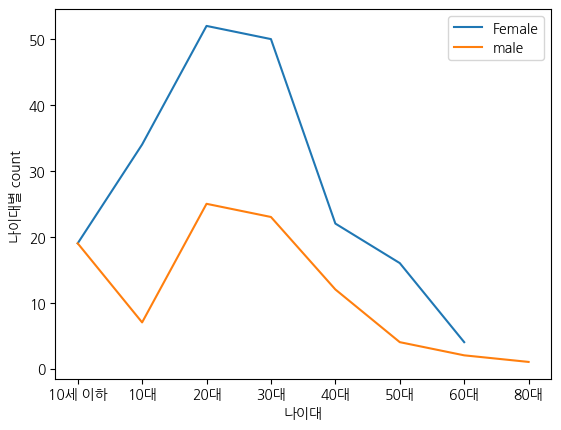

In [84]:
plt.plot(t_df_s_c_df_f['age_group'],t_df_s_c_df_f['count'],label='Female')
plt.plot(t_df_s_c_df_m['age_group'],t_df_s_c_df_m['count'],label='male')

plt.xlabel("나이대")
plt.ylabel("나이대별 count ")
plt.legend()

plt.show()